

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
>
> Which genres are most popular? What kinds of properties are associated with movies that have high revenues?


In [891]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [892]:
# Load The dataset
df = pd.read_csv("tmdb_movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [893]:
# Examining the data
df.describe()
df.convert_dtypes()
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)


### Data Cleaning 
> 1) Checking for NAN values then dropping them because we can't fill ids or directors with mean or so
>
> 2) Dropping the columns that won't be needed like(Homepage, tagline, etc..)
>
> 3) removing the data that has zero revenue or zero budget

In [894]:
# Checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [895]:
# Dropping unused Coloums
df.drop(labels=["homepage","keywords","overview","tagline",],axis=1,inplace=True)

In [896]:
# Droping rows with zero revenue or budget
df.loc[df.revenue_adj<10,['revenue_adj']] = np.nan
df.loc[df.budget_adj<10,['budget_adj']] = np.nan

In [897]:
# Another Dataset containing the Genres Separated
df_genres = df.assign(genres=df.genres.str.split("|")).explode("genres")

In [898]:
# Deletong all the rows with null values
df.dropna(inplace=True)
df_genres.dropna(inplace=True)

In [899]:
# Taking a look at the data after cleaning
df.shape
df_genres

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Drama,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,War,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07


<a id='eda'></a>

## Exploratory Data Analysis

### Research Question 1 (Which genres are the most popular?!)

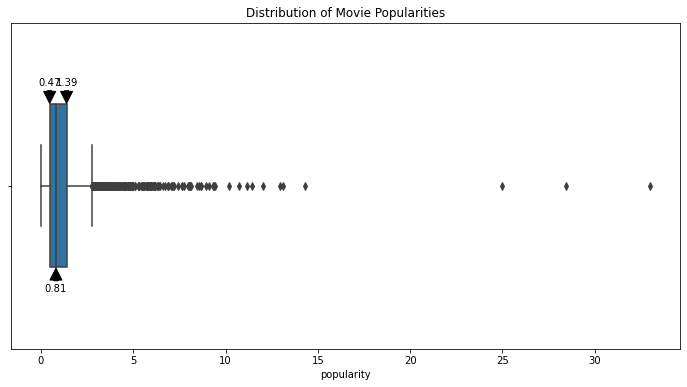

In [900]:
def annot_boxplot(df, varname, box_width=0.5):
    """ Create an annotated boxplot.

    Args:
        df: The DataFrame
        varname: Variable name in df
        box_width: Width of the box

    This function creates a univariate boxplot with its mean and quartiles.
    """
    ax = sns.boxplot(x=df[varname], width=box_width)

    Q1, Q2, Q3 = df[varname].quantile([0.25, 0.5, 0.75])
    for q in (Q1, Q3):
        x = q
        y = 0-box_width/2
        ax.annotate('%.2f' % q, (x,y),
                    xytext=(x, y-0.05), textcoords='data',
                    arrowprops=dict(facecolor='black', shrink=0.05),
                    va='bottom', ha='center')

    x = Q2
    y = 0+box_width/2
    ax.annotate('%.2f' % Q2, (x,y),
        xytext=(x, y+0.05), textcoords='data',
        arrowprops=dict(facecolor='black', shrink=0.05),
        va='top', ha='center')
    return ax

plt.figure(figsize=(12,6))        
ax = annot_boxplot(df, 'popularity')
ax.set_title("Distribution of Movie Popularities");

<AxesSubplot:title={'center':'Popularity Vs Genre'}, xlabel='Genre', ylabel='Popularity'>

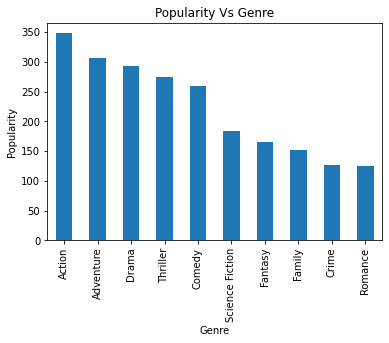

In [901]:
# Choosing the popular movies that exists in the upper quartile of popularity
popular = df_genres.popularity > df_genres.popularity.quantile([0.25,0.5,0.75]).to_list()[2]
(df_genres[popular].genres.value_counts())[:10].plot(kind='bar',xlabel="Genre",ylabel="Popularity",title="Popularity Vs Genre")

### Research Question 2 (Which genres has the top votes?!)

<AxesSubplot:title={'center':'Popularity Vs top votes'}, xlabel='top votes', ylabel='Popularity'>

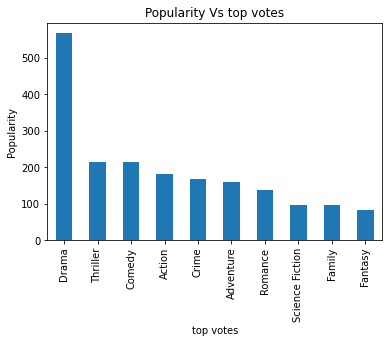

In [902]:
# Choosing the popular movies that exists in the upper quartile of vote average

top_rated = df_genres.vote_average > df_genres.vote_average.quantile([0.25,0.5,0.75]).to_list()[2]
(df_genres[top_rated].genres.value_counts())[:10].plot(kind='bar',xlabel="top votes",ylabel="Popularity",title="Popularity Vs top votes")

### Research Question 3 (Which genres has the longest runtime?!)

<AxesSubplot:title={'center':'Popularity Vs runtime'}, xlabel='runtime', ylabel='Popularity'>

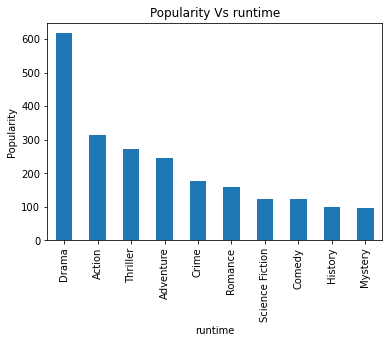

In [903]:
# Choosing the popular movies that exists in the upper quartile of runtime

longest = df_genres.runtime > df_genres.runtime.quantile([0.25,0.5,0.75]).to_list()[2]
(df_genres[longest].genres.value_counts())[:10].plot(kind='bar',xlabel="runtime",ylabel="Popularity",title="Popularity Vs runtime")

### Research Question 4 (Which genres is the most popular over the years?!)

<AxesSubplot:xlabel='release_year', ylabel='genres'>

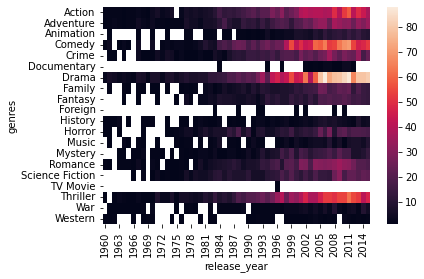

In [904]:
# Applying A heatmap to visualize the popularity data according to every genre all over the years
genre = df_genres.groupby('genres').release_year.value_counts().unstack()
sns.heatmap(genre)

***Now YOu Can see that the popularity increase over the years***

***The most popular genres are Drama, Comedy and Thriller based on the heat:)***

### Research Question 5 (Is ther a relation between popularity,Genres,votes, budget, runtime and revenue?!)

<AxesSubplot:title={'center':'Revenue Vs Budget'}, xlabel='budget_adj', ylabel='revenue_adj'>

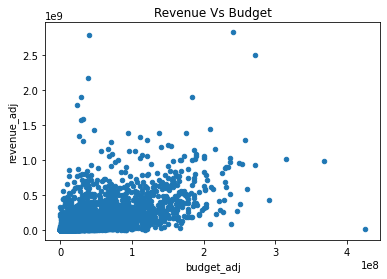

In [906]:
# Finding Correlation Between "budget_adj" and"revenue_adj"
df.plot.scatter(x="budget_adj",y="revenue_adj",title="Revenue Vs Budget")

<AxesSubplot:title={'center':'Revenue Vs runtime'}, xlabel='runtime', ylabel='revenue_adj'>

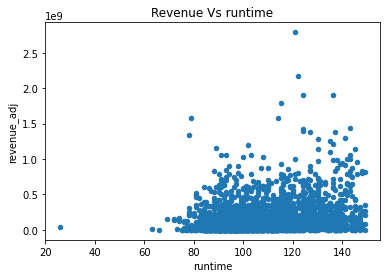

In [907]:
# Finding Correlation Between "runtime" and"revenue_adj"
df = df[df["runtime"]<150]
df.plot.scatter(x="runtime",y="revenue_adj",title="Revenue Vs runtime")

<AxesSubplot:title={'center':'Revenue Vs popularity'}, xlabel='popularity', ylabel='revenue_adj'>

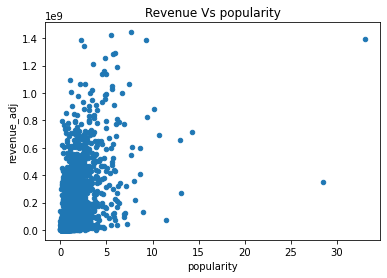

In [908]:
# Finding Correlation Between "popularity" and"revenue_adj"
df = df[df["revenue_adj"]<1513528810]
df.plot.scatter(x="popularity",y="revenue_adj",title="Revenue Vs popularity")

<AxesSubplot:title={'center':'Revenue Vs vote_average'}, xlabel='vote_average', ylabel='revenue_adj'>

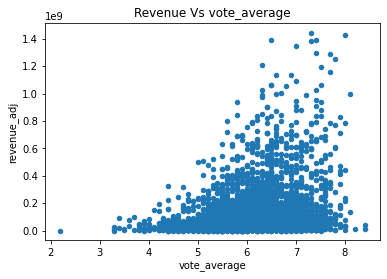

In [909]:
# Finding Correlation Between "vote_average" and"revenue_adj"
df.plot.scatter(x="vote_average",y="revenue_adj",title="Revenue Vs vote_average")

<AxesSubplot:title={'center':'Revenue Vs Genre'}, xlabel='Genre'>

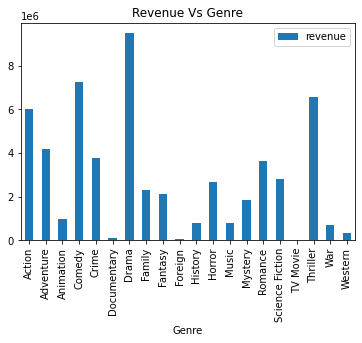

In [910]:
# Finding the highest "revenue_adj" of Movie "Genres"
rev = df_genres.groupby('genres').groups
rev_dict = {}
for i in rev.keys():
    rev_dict[i]=(sum(rev[i].to_list()))
rev_df = pd.DataFrame(rev_dict.items(), columns=["Genre","revenue"])
rev_df.plot(kind="bar",x="Genre",y="revenue",title="Revenue Vs Genre")
# rev_df

<a id='conclusions'></a>
## Conclusions

**(1):** Finally, It is obvious that the most popular genres are comedy and Drama

**(2):** The most voted and longest runtime genres are Drama and Thriller

**(3):** There is a positive correlation between runtime and revenue of the movie 

**(4):** There is a positive correlation between vote_average and revenue of the movie 

**(5):** The Highest Revenue per Genre is for Drama